# 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings #경고문구 무시
warnings.filterwarnings(action='ignore')

# 긍정어,부정어,중립어사전 열기

In [3]:
pos=pd.read_excel('./전처리 데이터/11.14긍정어부정어.xlsx' ,sheet_name='긍정어') 
neg=pd.read_excel('./전처리 데이터/11.14긍정어부정어.xlsx' ,sheet_name='부정어')
neu=pd.read_excel('./전처리 데이터/11.14긍정어부정어.xlsx' ,sheet_name='중립어')

In [4]:
pos_list=[]
for i in pos['단어']:
    pos_list.append(i)
     
neg_list=[]
for i in neg['단어']:
    neg_list.append(i)
 
neu_list = []
for i in neu['단어']:
    neu_list.append(i)

In [5]:
print(pos_list) #단어들 확인
print(neg_list)
print(neu_list)

['▲', '△', '↑', 'MOU', '간다', '강세', '경신', '계약', '고공', '고성장', '고점', '공격', '공동', '급등', '급등세', '급증', '기회', '깜짝', '껑충', '낙찰', '날개', '납품', '넘', '넘어섰', '넣', '노린다', '높', '는다', '늘', '늘어날', '달성', '대박', '대항마', '돌파', '돌풍', '땡큐', '뚫', '뜬', '랠리', '마련', '매수', '매입', '바닥', '벌', '부각', '불타', '빛났', '사고', '사면', '사자', '상', '상', '상승', '상장', '상한가', '상향', '상향', '상회', '서프라이즈', '선정', '설립', '성공', '성장', '쇄도', '수상', '수주', '승승장구', '승인', '시너지', '신고', '실탄', '양호', '연다', '열풍', '오르', '오른', '오른다', '오름', '오름세', '유치', '익', '인수', '일위', '재원', '저', '전환점', '절감', '정배', '제쳤', '제휴', '주목', '증가', '증설', '증자', '증폭', '진출', '질주', '청신호', '체결', '최고', '최대', '최초', '추월', '추진', '출원', '출자', '취득', '타진', '특허', '폭', '폭풍', '해소', '해제', '허용', '협력', '협상', '협약', '혜주', '호실', '호응', '호재', '화끈', '확대', '확장', '활발', '활황', '회복', '회복세', '효능', '휩쓰', '흑자', '흑자전환', '흥행']
['▼', '▽', '↓', '감소', '거짓', '게이트', '결렬', '고전', '고평', '공매도', '공포', '과징금', '구형', '금지', '급감', '급락', '급락세', '이하', '기소', '깨졌', '낮', '내린', '내린다', '내림', '내림세', '늑장', '대란', '디폴트', '하', '리스크', '매각', '매도',

# csv파일 불러오기와서 데이터 전처리

In [7]:
df=pd.read_csv('증권17_전처리.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Unnamed: 0.1', axis=1, inplace=True)

In [11]:
df['작성시간']=pd.to_datetime(df['작성시간']) #datatime으로 변경
df['작성시간']

0        2017-01-01 22:53:00
1        2017-01-01 21:37:00
2        2017-01-01 19:45:00
3        2017-01-01 19:41:00
4        2017-01-01 19:39:00
                 ...        
314616   2017-12-31 06:03:00
314617   2017-12-31 06:02:00
314618   2017-12-31 06:01:00
314619   2017-12-31 06:01:00
314620   2017-12-31 06:01:00
Name: 작성시간, Length: 314621, dtype: datetime64[ns]

### null값 확인 후 제거

In [12]:
df.isnull().sum() 

제목      4
작성시간    0
dtype: int64

In [13]:
df.dropna(axis=0, inplace=True) 

In [14]:
df.isnull().sum()

제목      0
작성시간    0
dtype: int64

In [151]:
df.drop('Unnamed: 0', axis=1, inplace=True)  

In [152]:
df.head()

제목       작성시간
0  신년사이병래 예탁결제원 사장 자본시장 혁신과 일자리 창출 목표 2018-01-01
1                 하나금융투자 더 큰 버블이 기다린다 2018-01-01
2            코스피 상장사 지난해 합병 줄고 분할 늘었다 2018-01-01
3                  전방위 규제에 위축서울 더 오른다 2018-01-01
4                코스피코스닥한국증시 새로운 길 열린다 2018-01-01

In [16]:
df[['형태소','점수']]=0 #형태소, 점수칼럼추가
df

제목                작성시간  형태소  점수
0                  인사 국민연금공단 기금운용본부 2017-01-01 22:53:00    0   0
1           국민연금 기금운용본부 운용전략실장에 이수철 2017-01-01 21:37:00    0   0
2           금리 오르면 사모펀드에 투자기회 늘어날 것 2017-01-01 19:45:00    0   0
3          마켓인사이트 KB증권 JW바이오 지분  인수 2017-01-01 19:41:00    0   0
4         증권사 이달부터 ELS 헤지자산 구분 관리해야 2017-01-01 19:39:00    0   0
...                             ...                 ...  ...  ..
314616     이번주 증시삼성전자 분기 잠정실적 발표 예정 2017-12-31 06:03:00    0   0
314617  그때 비트코인 샀어야지세상에서 가장 우울한 사이트 2017-12-31 06:02:00    0   0
314618           표 주요국 통화 환율실질가치 추이 2017-12-31 06:01:00    0   0
314619        원화 트럼프 년에  절상년 만에 최대폭 2017-12-31 06:01:00    0   0
314620    주가 상승률 위 차전지 코스모화학바이오 신라젠 2017-12-31 06:01:00    0   0

[314617 rows x 4 columns]

# 형태소분석 -mecab사용

In [17]:
from konlpy.tag import Mecab
mecab = Mecab()

In [18]:
pos

단어  점수
0       ▲   1
1       △   1
2       ↑   1
3     MOU   1
4      간다   1
..    ...  ..
128    효능   1
129    휩쓰   1
130    흑자   1
131  흑자전환   1
132    흥행   1

[133 rows x 2 columns]

In [19]:
list(pos['단어']) #씨리즈를 리스트로 바꿔줘야 if문 돌아가더라. 왠지는모르겠음 

['▲',
 '△',
 '↑',
 'MOU',
 '간다',
 '강세',
 '경신',
 '계약',
 '고공',
 '고성장',
 '고점',
 '공격',
 '공동',
 '급등',
 '급등세',
 '급증',
 '기회',
 '깜짝',
 '껑충',
 '낙찰',
 '날개',
 '납품',
 '넘',
 '넘어섰',
 '넣',
 '노린다',
 '높',
 '는다',
 '늘',
 '늘어날',
 '달성',
 '대박',
 '대항마',
 '돌파',
 '돌풍',
 '땡큐',
 '뚫',
 '뜬',
 '랠리',
 '마련',
 '매수',
 '매입',
 '바닥',
 '벌',
 '부각',
 '불타',
 '빛났',
 '사고',
 '사면',
 '사자',
 '상',
 '상',
 '상승',
 '상장',
 '상한가',
 '상향',
 '상향',
 '상회',
 '서프라이즈',
 '선정',
 '설립',
 '성공',
 '성장',
 '쇄도',
 '수상',
 '수주',
 '승승장구',
 '승인',
 '시너지',
 '신고',
 '실탄',
 '양호',
 '연다',
 '열풍',
 '오르',
 '오른',
 '오른다',
 '오름',
 '오름세',
 '유치',
 '익',
 '인수',
 '일위',
 '재원',
 '저',
 '전환점',
 '절감',
 '정배',
 '제쳤',
 '제휴',
 '주목',
 '증가',
 '증설',
 '증자',
 '증폭',
 '진출',
 '질주',
 '청신호',
 '체결',
 '최고',
 '최대',
 '최초',
 '추월',
 '추진',
 '출원',
 '출자',
 '취득',
 '타진',
 '특허',
 '폭',
 '폭풍',
 '해소',
 '해제',
 '허용',
 '협력',
 '협상',
 '협약',
 '혜주',
 '호실',
 '호응',
 '호재',
 '화끈',
 '확대',
 '확장',
 '활발',
 '활황',
 '회복',
 '회복세',
 '효능',
 '휩쓰',
 '흑자',
 '흑자전환',
 '흥행']

In [20]:
'MOU' in list(pos['단어']) #형태소가 긍정어사전 리스트에 있는지 확인하고

True

In [21]:
pos[pos['단어']=='MOU']

단어  점수
3  MOU   1

In [22]:
pos[pos['단어']=='MOU'].index

Int64Index([3], dtype='int64')

In [161]:
pos[pos['단어']=='MOU'].index[0] #긍정어의 인덱스값 (몇번째있는지) 알아낸다 >>> 점수값찾기위함 

3

In [23]:
num=0
for i in range(len(df['제목'])): 
    
    try:   #형태소 변환 안되면 pass
        word= mecab.morphs(df['제목'][i])  #미캡은 리스트안됨. 문자열만 가능하다고 함 
    #         print(word)
        df['형태소'][i]= word
        count=0


        for j in range(len(word)):   #형태소 점수합

            if word[j] in list(pos['단어']):    
                count= count+ pos['점수'][pos[pos['단어']==word[j]].index[0]]  #형태소가 긍정어 사전에 있으면, 사전의 점수반영     

            elif word[j] in list(neg['단어']):
                count= count+ neg['점수'][neg[neg['단어']==word[j]].index[0]] 

            elif word[j] in list(neu['단어']):
                count= count+ neu['점수'][neu[neu['단어']==word[j]].index[0]] 

    except:
            pass

    #     print(count)

#단일기사별 부정/긍정 판단 
    if count > 0 :
        df['점수'][i]= 1
    elif count==0 : 
        df['점수'][i]= 0
    elif count < 0 :
        df['점수'][i]= -1

    num+=1
    if num % 5000 == 0 :
        print(num, '개 완료')

5000 개 완료
10000 개 완료
15000 개 완료
20000 개 완료
25000 개 완료
30000 개 완료
35000 개 완료
40000 개 완료
45000 개 완료
50000 개 완료
55000 개 완료
60000 개 완료
65000 개 완료
70000 개 완료
75000 개 완료
80000 개 완료
85000 개 완료
90000 개 완료
95000 개 완료
100000 개 완료
105000 개 완료
110000 개 완료
115000 개 완료
120000 개 완료
125000 개 완료
130000 개 완료
135000 개 완료
140000 개 완료
145000 개 완료
150000 개 완료
155000 개 완료
160000 개 완료
165000 개 완료
170000 개 완료
175000 개 완료
180000 개 완료
185000 개 완료
190000 개 완료
195000 개 완료
200000 개 완료
205000 개 완료
210000 개 완료
215000 개 완료
220000 개 완료
225000 개 완료
230000 개 완료
235000 개 완료
240000 개 완료
245000 개 완료
250000 개 완료
255000 개 완료
260000 개 완료
265000 개 완료
270000 개 완료
275000 개 완료
280000 개 완료
285000 개 완료
290000 개 완료
295000 개 완료
300000 개 완료
305000 개 완료
310000 개 완료


In [26]:
df[:30]

제목                작성시간  \
0                          인사 국민연금공단 기금운용본부 2017-01-01 22:53:00   
1                   국민연금 기금운용본부 운용전략실장에 이수철 2017-01-01 21:37:00   
2                   금리 오르면 사모펀드에 투자기회 늘어날 것 2017-01-01 19:45:00   
3                  마켓인사이트 KB증권 JW바이오 지분  인수 2017-01-01 19:41:00   
4                 증권사 이달부터 ELS 헤지자산 구분 관리해야 2017-01-01 19:39:00   
5                   국민연금 기금운용본부 운용전략실장에 이수철 2017-01-01 19:39:00   
6                  상하이증시 자본유출통상전쟁 등 악재 첩첩산중 2017-01-01 19:32:00   
7                   뉴욕증시 월 효과 기대고용제조업 지표 관심 2017-01-01 19:31:00   
8                      한일퍼스트운용 헤지펀드 운용사로 출범 2017-01-01 19:31:00   
9             황영기 야성상상력으로 혁신박현주 익숙한 것과 결별하라 2017-01-01 19:29:00   
10             지난달 서울 아파트 거래량 급감전달에 비해 나 줄어 2017-01-01 19:21:00   
11                 국민연금 업무 마비국민 불신 커질까 더 걱정 2017-01-01 18:35:00   
12                 주간 브리핑 새해 첫 증시 일 오전 시 개장 2017-01-01 18:29:00   
13          IT 주도로 박스피 뚫을 것  금리인상에도 증시전망 밝아 2017-01-01 18:25:00   
14          대예측  원유 오르고 금 내린다 원자재펀드도 옥석 가려라 2017-01-01 18:09:00   
15          대예측  올해 코스피 전망 pt 박스피 뚫고 지붕킥 할까 2017-01-01 18:08:00   
16                   대전환 골든타임  금융허브로 떠오른 선전 2017-01-01 17:53:00   
17   대전환 골든타임 증시 돈맥경화 선진국보다 높은 투자 문턱 낮춰 풀어야 2017-01-01 17:53:00   
18      대도약   중반 성장 사수 소비심리 개선에 달려수출은 회복 기대 2017-01-01 17:42:00   
19                   대도약  당분간 강달러분기 원 찍을 수도 2017-01-01 17:39:00   
20          닭띠 CEO 이광구 우리은행장 민영화 성공 후 행보 주목 2017-01-01 06:36:00   
21                             경제신춘문예 대상눈보라 2017-01-01 06:35:00   
22         정유년 거취가 주목되는 붉은 닭띠 CEO 조용병 신한은행장 2017-01-01 06:32:00   
23                 호증권사 교보 김해준대표 기업가치극대화 올인 2017-01-01 06:30:00   
24                  이현 키움운용 대표 펀드 실적돌풍 이어간다 2017-01-01 06:30:00   
25          전문가들 수출입업체 꼭 헤지하고 유학생 부모는 분할 환전 2017-01-01 06:09:00   
26                   부러운 브라질러시아  주가통화가치 날았다 2017-01-01 06:09:00   
27                     이번주 증시 월 FOMC 의사록 공개 2017-01-01 06:03:00   
28                글로벌 공략 가속화로 세계 최고 수액기업 도약 2017-01-01 06:00:00   
29           트럼프 행정부 출범 앞두고 연초 변동성 심화 여부 주목 2017-01-01 06:00:00   

                                                  형태소  점수  
0                        [인사, 국민, 연금, 공단, 기금, 운용, 본부]   0  
1            [국민, 연금, 기금, 운용, 본부, 운용, 전략, 실장, 에, 이수철]   0  
2              [금리, 오르, 면, 사모, 펀드, 에, 투자, 기회, 늘어날, 것]   1  
3                 [마켓, 인사이트, KB, 증권, JW, 바이오, 지분, 인수]   1  
4              [증권사, 이달, 부터, ELS, 헤지, 자산, 구분, 관리, 해야]   0  
5            [국민, 연금, 기금, 운용, 본부, 운용, 전략, 실장, 에, 이수철]   0  
6            [상하, 이증, 시, 자본, 유출, 통상, 전쟁, 등, 악재, 첩첩산중]  -1  
7                [뉴욕, 증시, 월, 효과, 기대, 고용, 제조업, 지표, 관심]   0  
8               [한, 일, 퍼스트, 운용, 헤지, 펀드, 운용, 사, 로, 출범]   0  
9   [황영기, 야성, 상상력, 으로, 혁신, 박현주, 익숙, 한, 것, 과, 결별, 하...  -1  
10        [지난달, 서울, 아파트, 거래량, 급감, 전달, 에, 비해, 나, 줄, 어]  -1  
11             [국민, 연금, 업무, 마비, 국민, 불신, 커, 질까, 더, 걱정]   0  
12                 [주간, 브리핑, 새해, 첫, 증시, 일, 오전, 시, 개장]   0  
13  [IT, 주도, 로, 박스, 피, 뚫, 을, 것, 금리, 인상, 에, 도, 증시, ...   1  
14    [대, 예측, 원유, 오르, 고, 금, 내린다, 원자재, 펀드, 도, 옥석, 가려라]   0  
15   [대, 예측, 올해, 코스피, 전망, pt, 박스, 피, 뚫, 고, 지붕, 킥, 할까]   1  
16                  [대전환, 골든, 타임, 금융, 허브, 로, 떠오른, 선전]   0  
17  [대전환, 골든, 타임, 증시, 돈, 맥경, 화, 선진국, 보다, 높, 은, 투자,...   1  
18  [대, 도약, 중반, 성장, 사수, 소비, 심리, 개선, 에, 달려, 수출, 은, ...   1  
19             [대, 도약, 당분간, 강, 달러, 분기, 원, 찍, 을, 수, 도]   0  
20        [닭띠, CEO, 이광구, 우리, 은행장, 민영화, 성공, 후, 행보, 주목]   1  
21                                [경제, 신춘문예, 대상, 눈보라]   0  
22  [정유, 년, 거취, 가, 주목, 되, 는, 붉, 은, 닭띠, CEO, 조용병, 신...   1  
23           [호, 증권사, 교보, 김해준, 대표, 기업, 가치, 극대, 화, 올인]   0  
24             [이현, 키움, 운용, 대표, 펀드, 실적, 돌풍, 이, 어, 간다]   1  
25  [전문가, 들, 수출입, 업체, 꼭, 헤지, 하, 고, 유학, 생, 부모, 는, 분...  -1  
26               [부러운, 브라질, 러시아, 주가, 통화, 가치, 날, 았, 다]   0  
27                      [이번, 주, 증시, 월, FOMC, 의사록, 공개]   0  
28            [글로벌, 공략, 가속, 화, 로, 세계, 최고, 수액, 기업, 도약]   1  
29       [트럼프, 행정부, 출범, 앞두, 고, 연초, 변동, 성, 심화, 여부, 주목]   0

<AxesSubplot:>

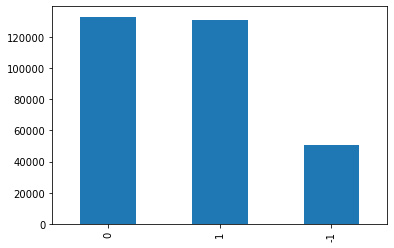

In [28]:
df['점수'].value_counts().plot(kind='bar')

# 전처리한 데이터 csv에 저장

In [164]:
df.to_csv('./전처리 데이터/증권3개년_3차프로젝트_형태소.csv.', encoding='utf-8-sig', index=False)

In [139]:
df1=pd.read_csv('./전처리 데이터/증권2018_3차프로젝트.csv')
df2=pd.read_csv('./전처리 데이터/증권2019_3차프로젝트.csv')
df3=pd.read_csv('./전처리 데이터/증권2020_3차프로젝트.csv')
df4=pd.concat([df1,df2,df3], axis=0)
df4.to_csv('./전처리 데이터/증권3개년_3차프로젝트.csv', encoding='utf-8-sig', index=False)

In [2]:
df1=pd.read_csv('./전처리 데이터/증권2017_3차프로젝트_형태소.csv')
df2=pd.read_csv('./전처리 데이터/증권3개년_3차프로젝트_형태소.csv')
df4=pd.concat([df1,df2], axis=0)
df4.to_csv('./전처리 데이터/증권4개년_3차프로젝트_형태소.csv', encoding='utf-8-sig', index=False)

In [3]:
df4

제목        작성시간  \
0                         인사 국민연금공단 기금운용본부  2017-01-01   
1                  국민연금 기금운용본부 운용전략실장에 이수철  2017-01-01   
2                  금리 오르면 사모펀드에 투자기회 늘어날 것  2017-01-01   
3                 마켓인사이트 KB증권 JW바이오 지분  인수  2017-01-01   
4                증권사 이달부터 ELS 헤지자산 구분 관리해야  2017-01-01   
...                                    ...         ...   
1147244         한국항공우주 국방과학연구소와 억 규모 계약 체결  2020-12-31   
1147245         사라지지 않은 코로나백신치료제 더 오른다 유망주  2020-12-31   
1147246  동학개미 덕에 두 배 뛴 반도체슈퍼사이클로 더 간다  유망주  2020-12-31   
1147247             채권 전문가  내년 채권 금리 보합 전망  2020-12-31   
1147248                           인사KR투자증권  2020-12-31   

                                                       형태소  점수  
0               ['인사', '국민', '연금', '공단', '기금', '운용', '본부']   0  
1        ['국민', '연금', '기금', '운용', '본부', '운용', '전략', '실장...   0  
2        ['금리', '오르', '면', '사모', '펀드', '에', '투자', '기회',...   1  
3        ['마켓', '인사이트', 'KB', '증권', 'JW', '바이오', '지분', ...   1  
4        ['증권사', '이달', '부터', 'ELS', '헤지', '자산', '구분', '...   0  
...                                                    ...  ..  
1147244  ['한국', '항공우주', '국방과학연구소', '와', '억', '규모', '계약'...   1  
1147245                                                  0   0  
1147246                                                  0   0  
1147247                                                  0   0  
1147248                                                  0   0  

[1461866 rows x 4 columns]

In [4]:
df4['형태소'].isin(['0']).count

<bound method Series.count of 0          False
1          False
2          False
3          False
4          False
           ...  
1147244    False
1147245     True
1147246     True
1147247     True
1147248     True
Name: 형태소, Length: 1461866, dtype: bool>

In [5]:
df4[df4['형태소']=='0'] #형태소변환 안된 행 검색 

제목        작성시간 형태소  점수
314611          글로벌 증시활황에 ELS 발행액도 사상 최대조원  2017-12-31   0   0
314612            이번주 증시삼성전자 분기 잠정실적 발표 예정  2017-12-31   0   0
314613         그때 비트코인 샀어야지세상에서 가장 우울한 사이트  2017-12-31   0   0
314614                  표 주요국 통화 환율실질가치 추이  2017-12-31   0   0
314615               원화 트럼프 년에  절상년 만에 최대폭  2017-12-31   0   0
314616           주가 상승률 위 차전지 코스모화학바이오 신라젠  2017-12-31   0   0
1147245         사라지지 않은 코로나백신치료제 더 오른다 유망주  2020-12-31   0   0
1147246  동학개미 덕에 두 배 뛴 반도체슈퍼사이클로 더 간다  유망주  2020-12-31   0   0
1147247             채권 전문가  내년 채권 금리 보합 전망  2020-12-31   0   0
1147248                           인사KR투자증권  2020-12-31   0   0

In [6]:
df4[df4['형태소']=='0'].index

Int64Index([ 314611,  314612,  314613,  314614,  314615,  314616, 1147245,
            1147246, 1147247, 1147248],
           dtype='int64')

In [7]:
df4.drop(df4[df4['형태소']=='0'].index, axis=0, inplace=True) #제거

In [8]:
df4.to_csv('./전처리 데이터/증권4개년_3차프로젝트_형태소.csv', encoding='utf-8-sig', index=False)

In [9]:
df4

제목        작성시간  \
0                        인사 국민연금공단 기금운용본부  2017-01-01   
1                 국민연금 기금운용본부 운용전략실장에 이수철  2017-01-01   
2                 금리 오르면 사모펀드에 투자기회 늘어날 것  2017-01-01   
3                마켓인사이트 KB증권 JW바이오 지분  인수  2017-01-01   
4               증권사 이달부터 ELS 헤지자산 구분 관리해야  2017-01-01   
...                                   ...         ...   
1147240  셀트리온 송도 바이오클러스터 구축 지원 프로젝트 본격 가동  2020-12-31   
1147241                         인사 하이투자증권  2020-12-31   
1147242        증시 코스피 G 중 상승률 위저점 대비 배 급등  2020-12-31   
1147243                조광페인트 억 규모 물류창고 신축  2020-12-31   
1147244        한국항공우주 국방과학연구소와 억 규모 계약 체결  2020-12-31   

                                                       형태소  점수  
0               ['인사', '국민', '연금', '공단', '기금', '운용', '본부']   0  
1        ['국민', '연금', '기금', '운용', '본부', '운용', '전략', '실장...   0  
2        ['금리', '오르', '면', '사모', '펀드', '에', '투자', '기회',...   1  
3        ['마켓', '인사이트', 'KB', '증권', 'JW', '바이오', '지분', ...   1  
4        ['증권사', '이달', '부터', 'ELS', '헤지', '자산', '구분', '...   0  
...                                                    ...  ..  
1147240  ['셀', '트리', '온', '송도', '바이오', '클러스터', '구축', '지...   0  
1147241                           ['인사', '하이', '투자', '증권']   1  
1147242  ['증시', '코스피', 'G', '중', '상승', '률', '위', '저점', ...   1  
1147243             ['조광페인트', '억', '규모', '물류', '창고', '신축']   0  
1147244  ['한국', '항공우주', '국방과학연구소', '와', '억', '규모', '계약'...   1  

[1461850 rows x 4 columns]

In [10]:
df4[df4['형태소']=='0'].index

Int64Index([], dtype='int64')